In [104]:
import numpy as np
import matplotlib.pyplot as plt


[0]


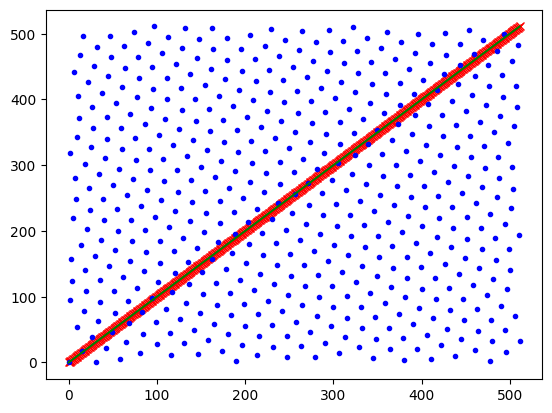

In [105]:
def qpp_interleaver(signal, N:int = 7, F: bool = True):
    
    # Lookup table for QPP interleaver coefficients
    interleaver_table = {
         7:[[15,32],[-17,32],[16,2,2,64]],
         9:[[31,64],[-33,64],[35,4,2,128]],
        11:[[63,128],[-65,128],[64,8,4,256]],
        13:[[127,256],[-129,256],[128,12,7,512]],
        15:[[255,512],[-257,512],[256,32,12,1024]],
        17:[[511,1024],[-513,1024],[512,64,23,1024]],
    }

    if N not in interleaver_table:
        raise ValueError(f"Invalid N value. N must be one of {' '.join(map(str, interleaver_table.keys()))}")

    interleaverCoefs = interleaver_table[N][0 if F else 1]
    Npow2=2**N
    rn='\n'

    # Generate the interleaver
    swaps=[(x*interleaverCoefs[0]+interleaverCoefs[1]*x**2)%Npow2 for x in range(Npow2)]
    #print(f"{'FWD' if F else 'REV'} SWAPS=\n "+" ".join([f'{xx:-3d}{rn if i % 32 == 31 else ""}' for i,xx in enumerate(swaps)]))
    # Apply the interleaver to the signal
    interleaved_signal=[]
    for i in range(0,len(signal),Npow2):
        interleaved_signal.extend([signal[i+swaps[j % Npow2]] for j in range(i,min(len(signal),i+Npow2))])
    
    return interleaved_signal

if __name__=='__main__':
    JJ=9
    pp=list(range(2**JJ))
    rnr='\n'
#    print("PP=\n "+" ".join([f'{xx:-3d}{rnr if i % 32 == 31 else ""}' for i,xx in enumerate(pp)]))

    NN=2**7
    print(list(range(0,len(pp),2**JJ)))
    # Plot
    plt.figure()
    plt.plot(pp,"rx")
    ppI=qpp_interleaver(pp,N=JJ)
#    print("ppI=\n "+" ".join([f'{xx:-3d}{rnr if i % 32 == 31 else ""}' for i,xx in enumerate(ppI)]))
    plt.plot(ppI,"b.")
    plt.plot(qpp_interleaver(ppI,F=False,N=JJ),"g-")



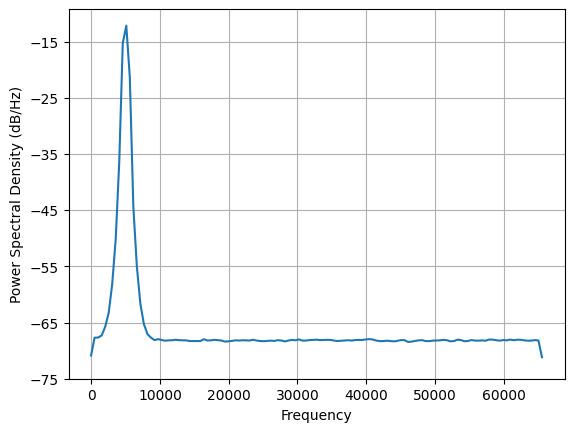

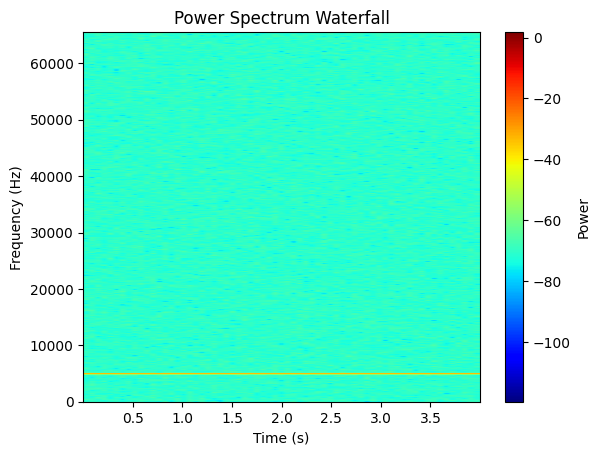

In [94]:

# Parameters
Fs = 2**17  # Sampling frequency (Hz)
Fc = 5000    # Frequency of the sine wave (Hz)
duration = 4  # Duration of the signal (seconds)
mean = 0  # Mean of the AWGN
stdev = 0.1  # Standard deviation of the AWGN

# Time vector
t = np.arange(0, duration, 1/Fs)

# Reference sine wave
Sref = 10*np.sin(2 * np.pi * Fc * t)

# AWGN
noise = np.random.normal(mean, stdev, len(t))

# Signal with AWGN
S = Sref + noise

# Power spectrum
frequencies, power_spectrum = plt.psd(S, Fs=Fs)

# Plot
fig,ax=plt.subplots(2,1)
plt.specgram(S, NFFT=2**13, Fs=Fs, noverlap=128, cmap='jet',ax=ax[0])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
#plt.yscale('log')
plt.title('Power Spectrum Waterfall')
plt.colorbar(label='Power')
# plt.show()

Si=qpp_interleaver(S,N=17)
plt.specgram(S, NFFT=2**13, Fs=Fs, noverlap=128, cmap='jet',ax=ax[1])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
#plt.yscale('log')
plt.title('Power Spectrum Waterfall')
plt.colorbar(label='Power')
plt.show()



[0]


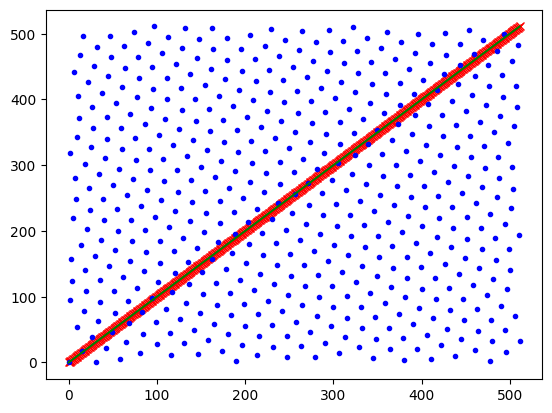

In [106]:
def qpp_interleaver(signal, N:int = 7, F: bool = True):
    
    # Lookup table for QPP interleaver coefficients
    interleaver_table = {
         7:[[15,32],[-17,32],[16,2,2,64]],
         9:[[31,64],[-33,64],[35,4,2,128]],
        11:[[63,128],[-65,128],[64,8,4,256]],
        13:[[127,256],[-129,256],[128,12,7,512]],
        15:[[255,512],[-257,512],[256,32,12,1024]],
        17:[[511,1024],[-513,1024],[512,64,23,1024]],
    }

    if N not in interleaver_table:
        raise ValueError(f"Invalid N value. N must be one of {' '.join(map(str, interleaver_table.keys()))}")

    interleaverCoefs = interleaver_table[N][0 if F else 1]
    Npow2=2**N
    rn='\n'

    # Generate the interleaver
    swaps=[(x*interleaverCoefs[0]+interleaverCoefs[1]*x**2)%Npow2 for x in range(Npow2)]
    #print(f"{'FWD' if F else 'REV'} SWAPS=\n "+" ".join([f'{xx:-3d}{rn if i % 32 == 31 else ""}' for i,xx in enumerate(swaps)]))
    # Apply the interleaver to the signal
    interleaved_signal=[]
    for i in range(0,len(signal),Npow2):
        interleaved_signal.extend([signal[i+swaps[j % Npow2]] for j in range(i,min(len(signal),i+Npow2))])
    
    return interleaved_signal

if __name__=='__main__':
    JJ=9
    pp=list(range(2**JJ))
    rnr='\n'
    # print("PP=\n "+" ".join([f'{xx:-3d}{rnr if i % 32 == 31 else ""}' for i,xx in enumerate(pp)]))

    NN=2**7
    print(list(range(0,len(pp),2**JJ)))
    # Plot
    plt.figure()
    plt.plot(pp,"rx")
    ppI=qpp_interleaver(pp,N=JJ)
    # print("ppI=\n "+" ".join([f'{xx:-3d}{rnr if i % 32 == 31 else ""}' for i,xx in enumerate(ppI)]))
    plt.plot(ppI,"b.")
    plt.plot(qpp_interleaver(ppI,F=False,N=JJ),"g-")

